In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from tqdm.notebook import tqdm
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR= 'C:\\Users\\singh\\OneDrive\\Desktop\\image processing folder\\archive\\images\\train'
TEST_DIR= 'C:\\Users\\singh\\OneDrive\\Desktop\\image processing folder\\archive\\images\\test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      C:\Users\singh\OneDrive\Desktop\image processi...     angry
1      C:\Users\singh\OneDrive\Desktop\image processi...     angry
2      C:\Users\singh\OneDrive\Desktop\image processi...     angry
3      C:\Users\singh\OneDrive\Desktop\image processi...     angry
4      C:\Users\singh\OneDrive\Desktop\image processi...     angry
...                                                  ...       ...
28816  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
28817  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
28818  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
28819  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
28820  C:\Users\singh\OneDrive\Desktop\image processi...  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\singh\OneDrive\Desktop\image processi...     angry
1     C:\Users\singh\OneDrive\Desktop\image processi...     angry
2     C:\Users\singh\OneDrive\Desktop\image processi...     angry
3     C:\Users\singh\OneDrive\Desktop\image processi...     angry
4     C:\Users\singh\OneDrive\Desktop\image processi...     angry
...                                                 ...       ...
7061  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
7062  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
7063  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
7064  C:\Users\singh\OneDrive\Desktop\image processi...  surprise
7065  C:\Users\singh\OneDrive\Desktop\image processi...  surprise

[7066 rows x 2 columns]
0       C:\Users\singh\OneDrive\Desktop\image processi...
1       C:\Users\singh\OneDrive\Desktop\image processi...
2       C:\Users\singh\OneDrive\Desktop\image processi...
3       C

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\singh\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
 11/226 [>.............................] - ETA: 10:39 - loss: 1.8707 - accuracy: 0.1939

KeyboardInterrupt: 

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
train_features = extract_features(train['image']) 

In [21]:
svm_model = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, eta0=0.001, random_state=42)

x_train_svm = x_train.reshape(x_train.shape[0], -1)
x_test_svm = x_test.reshape(x_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler().fit(x_train_svm)
x_train_svm = scaler.transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)
svm_model.fit(x_train_svm, y_train.argmax(axis=1))
svm_pred = svm_model.predict(x_test_svm)
svm_accuracy = accuracy_score(y_test.argmax(axis=1), svm_pred)

KeyboardInterrupt: 

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.argmax(axis=1))
rf_pred = rf_model.predict(x_test.reshape(x_test.shape[0], -1))
rf_accuracy = accuracy_score(y_test.argmax(axis=1), rf_pred)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.argmax(axis=1))
knn_pred = knn_model.predict(x_test.reshape(x_test.shape[0], -1))
knn_accuracy = accuracy_score(y_test.argmax(axis=1), knn_pred)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.argmax(axis=1))
lr_pred = lr_model.predict(x_test.reshape(x_test.shape[0], -1))
lr_accuracy = accuracy_score(y_test.argmax(axis=1), lr_pred)

KeyboardInterrupt: 

In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\singh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from keras.models import model_from_json

In [27]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [30]:
image = 'C:\\Users\\singh\\OneDrive\\Desktop\\image processing folder\\archive\\images\\train\\sad\\3.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]


original image is of sad


C:\Users\singh\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 481ms/step


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 33ms/step
model prediction is  sad


C:\Users\singh\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


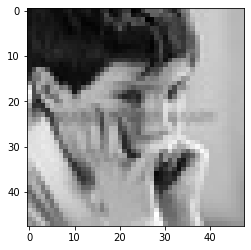

In [32]:
image = 'C:\\Users\\singh\\OneDrive\\Desktop\\image processing folder\\archive\\images\\train\\sad\\3.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 32ms/step
model prediction is  sad


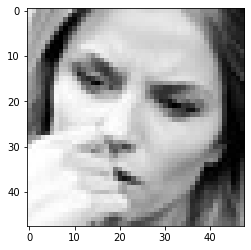

In [33]:
image = r"C:\Users\singh\OneDrive\Desktop\image processing folder\archive\images\train\fear\2.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')


original image is of disgust
1/1 [==============================] - 0s 38ms/step
model prediction is  disgust


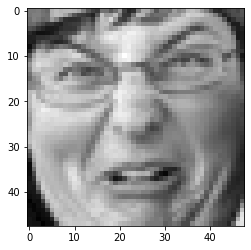

In [34]:
image = r"C:\Users\singh\OneDrive\Desktop\image processing folder\archive\images\train\disgust\299.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 62ms/step
model prediction is  happy


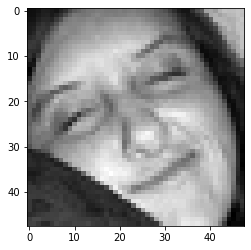

In [35]:
image = r"C:\Users\singh\OneDrive\Desktop\image processing folder\archive\images\train\happy\16.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 34ms/step
model prediction is  surprise


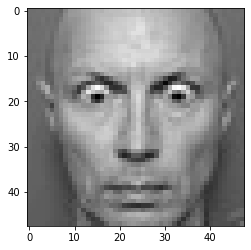

In [36]:
image = r"C:\Users\singh\OneDrive\Desktop\image processing folder\archive\images\train\surprise\15.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')